<a href="https://colab.research.google.com/github/jvaaguiar/Img2Mesh/blob/master/Img2Mesh_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[!] Training config (in/out)

In [0]:
from google.colab import drive
_ = drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
tarpath  = '/content/drive/\'My Drive\'/Img2Mesh/dataset/tars/'

In [0]:
# path to save checkpoints during the training
path_checkpoints_save = '/content/drive/\'My Drive\'/Img2Mesh/checkpoints/'
checkpoint_zip_name = 'checkpoint.zip'

out_vertices = 64
hidden_size = 4096

# Requirements

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
_ = !git clone https://github.com/jvaaguiar/Img2Mesh.git
import sys
sys.path.append('/content/Img2Mesh')

# Prepare Dataset

## Fetch data

In [0]:
datapath = "/content/Img2Mesh/data"
!mkdir {datapath}

tars = !ls -1 {tarpath}
for tar in tars:
  !tar -xf {tarpath + tar} -C {datapath}

In [0]:
paths = []
for t in tars:
  paths.append(datapath + '/' + t.replace('.tar.gz', '/train'))

In [0]:
from train import prepareTrainData
X, Y = prepareTrainData(paths, ratio=1, shape='2D', lean=True)
print(X.shape)

(3281, 1, 400, 400)


## Verify models sizes in Y

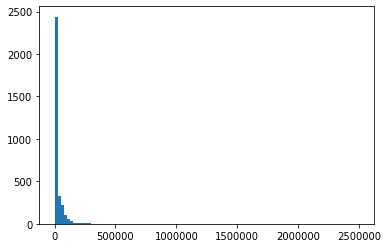

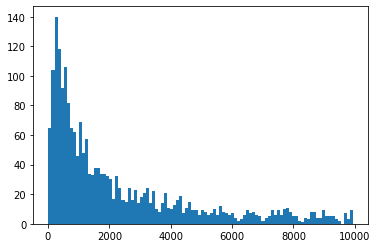

In [0]:
import matplotlib.pyplot as plt
import numpy as np
sizes = [y.shape[0] for y in Y]
sizes = np.array(sizes)
_ = plt.hist(sizes, bins=int(1e2))
plt.show()
_ = plt.hist(sizes[sizes < 1e4], bins=int(1e2))

## Downsample Y

In [0]:
from prepare_data import downsample
Y = downsample(Y, k=int(0.5e3))

# Train

In [0]:
# save the model's weights at the end of each batch

drive_chks = path_checkpoints_save + checkpoint_zip_name
model_chks = '/content/Img2Mesh/checkpoints/'
!mkdir /content/Img2Mesh/checkpoints/

def download(path):
  _ = !zip -r {drive_chks} {path}

batches: ..........  epoch :  0  ; loss =  0.06696580350399017  ( 19.65298557281494 secs)
batches: ..........  epoch :  1  ; loss =  0.019798889756202698  ( 14.85105848312378 secs)
batches: ..........  epoch :  2  ; loss =  0.015563125722110271  ( 14.8330659866333 secs)
batches: ..........  epoch :  3  ; loss =  0.013182918541133404  ( 14.48306655883789 secs)
batches: ..........  epoch :  4  ; loss =  0.012541905976831913  ( 15.137339353561401 secs)
batches: ..........  epoch :  5  ; loss =  0.011950356885790825  ( 14.714527606964111 secs)
batches: ..........  epoch :  6  ; loss =  0.01098738145083189  ( 15.302523136138916 secs)
batches: ..........  epoch :  7  ; loss =  0.010492250323295593  ( 15.059944868087769 secs)
batches: ..........  epoch :  8  ; loss =  0.009773844853043556  ( 14.973866939544678 secs)
batches: ..........  epoch :  9  ; loss =  0.009547503665089607  ( 14.882162809371948 secs)
batches: ..........  epoch :  10  ; loss =  0.009353823028504848  ( 14.92139744758606 s

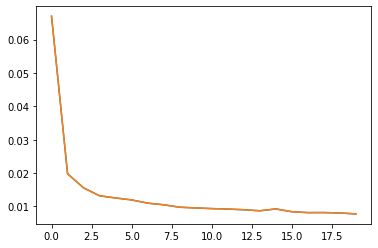

batches: ..........  epoch :  0  ; loss =  0.008094757795333862  ( 15.22748851776123 secs)
batches: ..........  epoch :  1  ; loss =  0.007777295541018248  ( 14.249739170074463 secs)
batches: ..........  epoch :  2  ; loss =  0.007345170713961124  ( 15.076106548309326 secs)
batches: ..........  epoch :  3  ; loss =  0.007454993668943644  ( 14.719180583953857 secs)
batches: ..........  epoch :  4  ; loss =  0.0075090923346579075  ( 14.287516355514526 secs)
batches: ..........  epoch :  5  ; loss =  0.007233305834233761  ( 14.731823205947876 secs)
batches: ..........  epoch :  6  ; loss =  0.007103715557605028  ( 14.677768230438232 secs)
batches: ..........  epoch :  7  ; loss =  0.007605342660099268  ( 14.399300813674927 secs)
batches: ..........  epoch :  8  ; loss =  0.006757804192602634  ( 14.10177993774414 secs)
batches: ..........  epoch :  9  ; loss =  0.007299706339836121  ( 14.379692316055298 secs)
batches: ..........  epoch :  10  ; loss =  0.00658046081662178  ( 15.06644868850

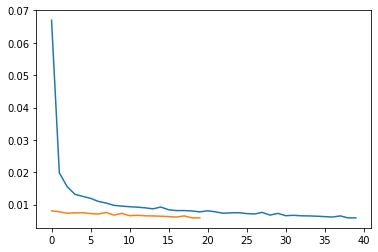

batches: ..........  epoch :  0  ; loss =  0.005809939932078123  ( 15.387635946273804 secs)
batches: ..........  epoch :  1  ; loss =  0.005808086134493351  ( 14.55063247680664 secs)
batches: ..........  epoch :  2  ; loss =  0.006001658271998167  ( 15.200890064239502 secs)
batches: ..........  epoch :  3  ; loss =  0.005506924353539944  ( 14.35806941986084 secs)
batches: ..........  epoch :  4  ; loss =  0.005476883612573147  ( 14.862329721450806 secs)
batches: ..........  epoch :  5  ; loss =  0.005762849003076553  ( 14.496792078018188 secs)
batches: ..........  epoch :  6  ; loss =  0.00542841013520956  ( 14.760239839553833 secs)
batches: ..........  epoch :  7  ; loss =  0.005512801464647055  ( 15.561121702194214 secs)
batches: ..........  epoch :  8  ; loss =  0.005870267283171415  ( 15.005529880523682 secs)
batches: ..........  epoch :  9  ; loss =  0.005488592199981213  ( 14.210963010787964 secs)
batches: ..........  epoch :  10  ; loss =  0.005283764563500881  ( 14.540177583694

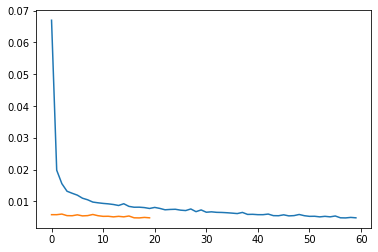

batches: ..........  epoch :  0  ; loss =  0.004705554340034723  ( 15.558805704116821 secs)
batches: ..........  epoch :  1  ; loss =  0.004563336726278067  ( 14.787250757217407 secs)
batches: ..........  epoch :  2  ; loss =  0.004707908723503351  ( 14.56711483001709 secs)
batches: ..........  epoch :  3  ; loss =  0.00488236453384161  ( 14.730246782302856 secs)
batches: ..........  epoch :  4  ; loss =  0.004600397311151028  ( 14.388633012771606 secs)
batches: ..........  epoch :  5  ; loss =  0.004432737827301025  ( 14.174108505249023 secs)
batches: ..........  epoch :  6  ; loss =  0.004402104765176773  ( 14.47538447380066 secs)
batches: ..........  epoch :  7  ; loss =  0.004382057581096888  ( 14.703744888305664 secs)
batches: ..........  epoch :  8  ; loss =  0.004409711807966232  ( 14.343810558319092 secs)
batches: ..........  epoch :  9  ; loss =  0.00424532825127244  ( 14.615235567092896 secs)
batches: ..........  epoch :  10  ; loss =  0.004285674076527357  ( 14.4386858940124

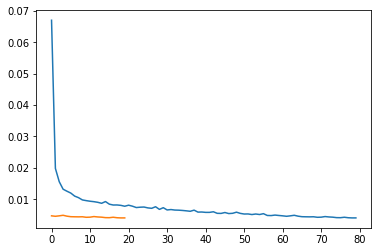

batches: ..........  epoch :  0  ; loss =  0.004072704818099737  ( 16.221039295196533 secs)
batches: ..........  epoch :  1  ; loss =  0.004208499100059271  ( 14.14921760559082 secs)
batches: ..........  epoch :  2  ; loss =  0.0039231604896485806  ( 14.304224252700806 secs)
batches: ..........  epoch :  3  ; loss =  0.0038223627489060163  ( 14.565168142318726 secs)
batches: ..........  epoch :  4  ; loss =  0.0038091051392257214  ( 14.296610116958618 secs)
batches: ..........  epoch :  5  ; loss =  0.003782707266509533  ( 14.94080138206482 secs)
batches: ..........  epoch :  6  ; loss =  0.0036912080831825733  ( 14.511784553527832 secs)
batches: ..........  epoch :  7  ; loss =  0.0036619841121137142  ( 14.743079662322998 secs)
batches: ..........  epoch :  8  ; loss =  0.0037627776619046926  ( 15.0283682346344 secs)
batches: ..........  epoch :  9  ; loss =  0.003625441575422883  ( 14.540273666381836 secs)
batches: ..........  epoch :  10  ; loss =  0.0035995100624859333  ( 14.616147

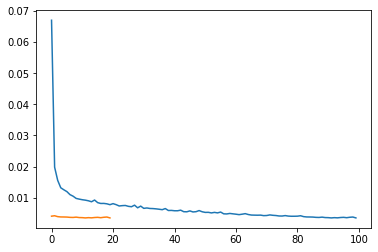

Trainning finished!


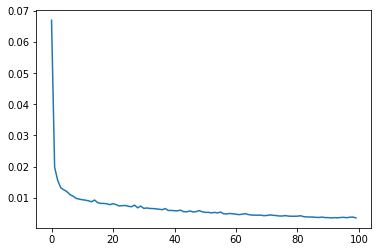

In [0]:
from train import saveCheckpoint
from train import runTraining, prepareNN

net, optim = prepareNN(out_verts  = out_vertices,
                       hidden_size= hidden_size,
                       model='lean',
                       learning_rate=0.0005)

losses = runTraining(optim, X, Y, batch_size=int(0.05*len(X)),
                      min_error=1e-3, min_step=1e-5,
                      max_repets=5,
                      num_epochs=20,
                      checkpoint_callback=saveCheckpoint(
                          path = '/content/Img2Mesh/checkpoints/',
                          download_callback=download))

batches: ..........  epoch :  0  ; loss =  0.0035396222956478596  ( 15.578693151473999 secs)
batches: ..........  epoch :  1  ; loss =  0.0035468460991978645  ( 14.556115865707397 secs)
batches: ..........  epoch :  2  ; loss =  0.0034713195636868477  ( 14.471364498138428 secs)
batches: ..........  epoch :  3  ; loss =  0.0035025530960410833  ( 14.447127103805542 secs)
batches: ..........  epoch :  4  ; loss =  0.0033730303402990103  ( 14.68960428237915 secs)
batches: ..........  epoch :  5  ; loss =  0.0034128346014767885  ( 14.168766260147095 secs)
batches: ..........  epoch :  6  ; loss =  0.003321698633953929  ( 14.516322135925293 secs)
batches: ..........  epoch :  7  ; loss =  0.0032648348715156317  ( 14.613669157028198 secs)
batches: ..........  epoch :  8  ; loss =  0.0032084828708320856  ( 14.375586032867432 secs)
batches: ..........  epoch :  9  ; loss =  0.0032427895348519087  ( 14.486922979354858 secs)
batches: ..........  epoch :  10  ; loss =  0.0033033129293471575  ( 14.

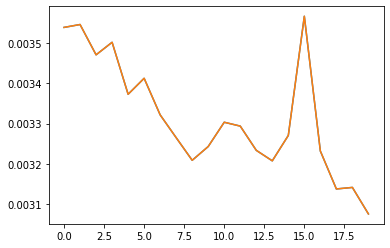

batches: ..........  epoch :  0  ; loss =  0.003096235916018486  ( 15.188024520874023 secs)
batches: ..........  epoch :  1  ; loss =  0.003192520933225751  ( 13.65327000617981 secs)
batches: ..........  epoch :  2  ; loss =  0.0030873222276568413  ( 14.757290363311768 secs)
batches: ..........  epoch :  3  ; loss =  0.0031808018684387207  ( 14.333409547805786 secs)
batches: ..........  epoch :  4  ; loss =  0.00321659236215055  ( 14.503626108169556 secs)
batches: ..........  epoch :  5  ; loss =  0.002961311722174287  ( 14.034298658370972 secs)
batches: ..........  epoch :  6  ; loss =  0.0030667611863464117  ( 14.817075967788696 secs)
batches: ..........  epoch :  7  ; loss =  0.0032510675955563784  ( 14.93747091293335 secs)
batches: ..........  epoch :  8  ; loss =  0.0030523964669555426  ( 14.23344111442566 secs)
batches: ..........  epoch :  9  ; loss =  0.0029516357462853193  ( 14.99579405784607 secs)
batches: ..........  epoch :  10  ; loss =  0.002918781479820609  ( 14.68372726

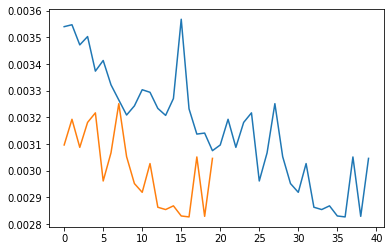

batches: ..........  epoch :  0  ; loss =  0.002836941508576274  ( 15.356682300567627 secs)
batches: ..........  epoch :  1  ; loss =  0.003135591046884656  ( 14.117477893829346 secs)
batches: ..........  epoch :  2  ; loss =  0.002940769772976637  ( 14.25812554359436 secs)
batches: ..........  epoch :  3  ; loss =  0.0029865095857530832  ( 14.605692863464355 secs)
batches: ..........  epoch :  4  ; loss =  0.0028412763494998217  ( 14.158466815948486 secs)
batches: ..........  epoch :  5  ; loss =  0.00275822845287621  ( 15.745716333389282 secs)
batches: ..........  epoch :  6  ; loss =  0.0027264610398560762  ( 13.93822455406189 secs)
batches: ..........  epoch :  7  ; loss =  0.002941807033494115  ( 14.549302816390991 secs)
batches: ..........  epoch :  8  ; loss =  0.0027781256940215826  ( 14.50197434425354 secs)
batches: ..........  epoch :  9  ; loss =  0.0027361412066966295  ( 14.424127578735352 secs)
batches: ..........  epoch :  10  ; loss =  0.0026399765629321337  ( 14.7085046

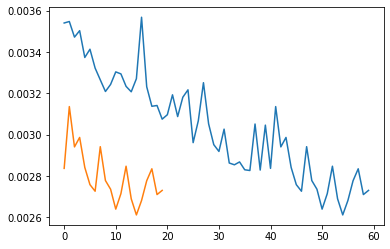

batches: ..........  epoch :  0  ; loss =  0.0026539121754467487  ( 14.85717248916626 secs)
batches: ..........  epoch :  1  ; loss =  0.002659966005012393  ( 14.434663534164429 secs)
batches: ..........  epoch :  2  ; loss =  0.002721651690080762  ( 14.688664674758911 secs)
batches: ..........  epoch :  3  ; loss =  0.0025073986034840345  ( 14.496264934539795 secs)
batches: ..........  epoch :  4  ; loss =  0.0024934872053563595  ( 14.236397743225098 secs)
batches: ..........  epoch :  5  ; loss =  0.002512811915948987  ( 14.417924165725708 secs)
batches: ..........  epoch :  6  ; loss =  0.0025868865195661783  ( 13.914607763290405 secs)
batches: ..........  epoch :  7  ; loss =  0.002577913925051689  ( 14.138605833053589 secs)
batches: ..........  epoch :  8  ; loss =  0.002534867962822318  ( 14.079485654830933 secs)
batches: ..........  epoch :  9  ; loss =  0.002568775787949562  ( 14.00168490409851 secs)
batches: ..........  epoch :  10  ; loss =  0.002650299808010459  ( 14.0809063

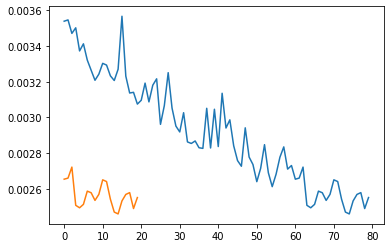

batches: ..........  epoch :  0  ; loss =  0.0025541747454553843  ( 15.119679689407349 secs)
batches: ..........  epoch :  1  ; loss =  0.0025899221654981375  ( 13.687558889389038 secs)
batches: ..........  epoch :  2  ; loss =  0.0025560487993061543  ( 14.01674509048462 secs)
batches: ..........  epoch :  3  ; loss =  0.0025527977850288153  ( 13.76469373703003 secs)
batches: ..........  epoch :  4  ; loss =  0.0024964814074337482  ( 14.566381454467773 secs)
batches: ..........  epoch :  5  ; loss =  0.002449396066367626  ( 14.336604118347168 secs)
batches: ..........  epoch :  6  ; loss =  0.0024081978481262922  ( 14.822560787200928 secs)
batches: ..........  epoch :  7  ; loss =  0.002686685649678111  ( 14.842758417129517 secs)
batches: ..........  epoch :  8  ; loss =  0.0023960645776242018  ( 13.902527332305908 secs)
batches: ..........  epoch :  9  ; loss =  0.0024507201742380857  ( 14.552751064300537 secs)
batches: ..........  epoch :  10  ; loss =  0.002504677977412939  ( 15.118

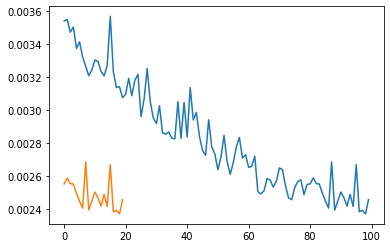

batches: ..........  epoch :  0  ; loss =  0.002294344361871481  ( 15.553205728530884 secs)
batches: ..........  epoch :  1  ; loss =  0.0023954433854669333  ( 14.09264588356018 secs)
batches: ..........  epoch :  2  ; loss =  0.002338060876354575  ( 13.760925531387329 secs)
batches: ..........  epoch :  3  ; loss =  0.002609923481941223  ( 14.35442304611206 secs)
batches: ..........  epoch :  4  ; loss =  0.0022742608562111855  ( 14.440271377563477 secs)
batches: ..........  epoch :  5  ; loss =  0.002276585903018713  ( 14.164393186569214 secs)
batches: ..........  epoch :  6  ; loss =  0.0022656710352748632  ( 14.46701717376709 secs)
batches: ..........  epoch :  7  ; loss =  0.0022588539868593216  ( 15.01379919052124 secs)
batches: ..........  epoch :  8  ; loss =  0.002223700750619173  ( 14.673021793365479 secs)
batches: ..........  epoch :  9  ; loss =  0.0022756431717425585  ( 14.33763074874878 secs)
batches: ..........  epoch :  10  ; loss =  0.0022998270578682423  ( 13.74252414

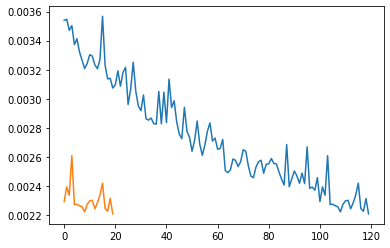

batches: ..........  epoch :  0  ; loss =  0.002283387118950486  ( 15.264761447906494 secs)
batches: ..........  epoch :  1  ; loss =  0.00308891199529171  ( 13.813110113143921 secs)
batches: ..........  epoch :  2  ; loss =  0.002203157637268305  ( 14.295058965682983 secs)
batches: ..........  epoch :  3  ; loss =  0.002205297816544771  ( 14.392464876174927 secs)
batches: ..........  epoch :  4  ; loss =  0.0022862327750772238  ( 14.868087768554688 secs)
batches: ..........  epoch :  5  ; loss =  0.0022047569509595633  ( 14.095601558685303 secs)
batches: ..........  epoch :  6  ; loss =  0.0022156438790261745  ( 14.152107238769531 secs)
batches: ..........  epoch :  7  ; loss =  0.002218828769400716  ( 14.133843183517456 secs)
batches: ..........  epoch :  8  ; loss =  0.002276446670293808  ( 14.371998071670532 secs)
batches: ..........  epoch :  9  ; loss =  0.0022262793499976397  ( 13.758397102355957 secs)
batches: ..........  epoch :  10  ; loss =  0.0021909528877586126  ( 14.11384

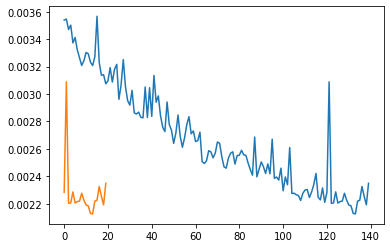

batches: ..........  epoch :  0  ; loss =  0.0022062312345951796  ( 15.017174243927002 secs)
batches: ..........  epoch :  1  ; loss =  0.002208273159340024  ( 13.934816122055054 secs)
batches: ..........  epoch :  2  ; loss =  0.0021799795795232058  ( 14.846012830734253 secs)
batches: ..........  epoch :  3  ; loss =  0.0022067991085350513  ( 14.019811630249023 secs)
batches: ..........  epoch :  4  ; loss =  0.002482773968949914  ( 15.063358306884766 secs)
batches: ..........  epoch :  5  ; loss =  0.002190532861277461  ( 14.5773344039917 secs)
batches: ..........  epoch :  6  ; loss =  0.0022018118761479855  ( 14.670746088027954 secs)
batches: ..........  epoch :  7  ; loss =  0.0021412414498627186  ( 14.089478731155396 secs)
batches: ..........  epoch :  8  ; loss =  0.002234791638329625  ( 14.561249732971191 secs)
batches: ..........  epoch :  9  ; loss =  0.0021624816581606865  ( 14.331964492797852 secs)
batches: ..........  epoch :  10  ; loss =  0.0021503809839487076  ( 14.0656

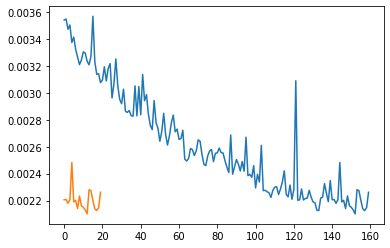

batches: ..........  epoch :  0  ; loss =  0.0021345806308090687  ( 15.37608790397644 secs)
batches: ..........  epoch :  1  ; loss =  0.0020482114050537348  ( 14.476438283920288 secs)
batches: ..........  epoch :  2  ; loss =  0.0020221415907144547  ( 14.277905464172363 secs)
batches: ..........  epoch :  3  ; loss =  0.0020953905768692493  ( 14.103748559951782 secs)
batches: ..........  epoch :  4  ; loss =  0.002083208877593279  ( 14.389798164367676 secs)
batches: ..........  epoch :  5  ; loss =  0.0028262161649763584  ( 15.373676776885986 secs)
batches: ..........  epoch :  6  ; loss =  0.002066519111394882  ( 14.282656192779541 secs)
batches: ..........  epoch :  7  ; loss =  0.002054001437500119  ( 14.61116361618042 secs)
batches: ..........  epoch :  8  ; loss =  0.002037405502051115  ( 14.4134042263031 secs)
batches: ..........  epoch :  9  ; loss =  0.0020048643928021193  ( 14.375844240188599 secs)
batches: ..........  epoch :  10  ; loss =  0.0020228195935487747  ( 14.236226

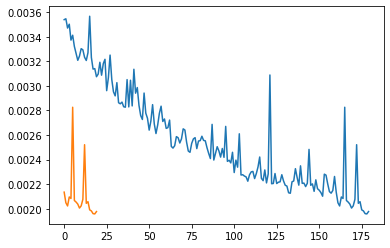

batches: ..........  epoch :  0  ; loss =  0.0020186747424304485  ( 15.679230690002441 secs)
batches: ..........  epoch :  1  ; loss =  0.0019828402437269688  ( 14.796528577804565 secs)
batches: ..........  epoch :  2  ; loss =  0.0020109640900045633  ( 14.275453805923462 secs)
batches: ..........  epoch :  3  ; loss =  0.002132655819877982  ( 14.835201740264893 secs)
batches: ..........  epoch :  4  ; loss =  0.002002712804824114  ( 14.792814016342163 secs)
batches: ..........  epoch :  5  ; loss =  0.0024658937472850084  ( 14.430064678192139 secs)
batches: ..........  epoch :  6  ; loss =  0.002022828906774521  ( 14.80524206161499 secs)
batches: ..........  epoch :  7  ; loss =  0.0019998643547296524  ( 14.709421157836914 secs)
batches: ..........  epoch :  8  ; loss =  0.002011154778301716  ( 14.894604682922363 secs)
batches: ..........  epoch :  9  ; loss =  0.001969072036445141  ( 14.406546831130981 secs)
batches: ..........  epoch :  10  ; loss =  0.0019549422431737185  ( 14.7521

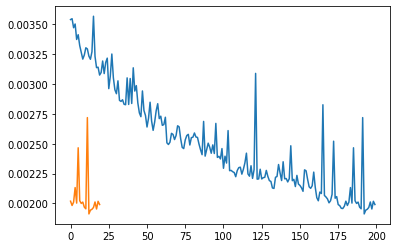

Trainning finished!


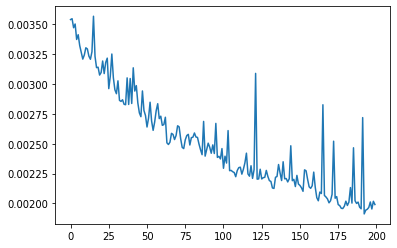

In [0]:
# the trainning can be continued as many times as you want :)
losses = runTraining(optim, X, Y, batch_size=int(0.05*len(X)),
                      min_error=1e-3, min_step=1e-5,
                      max_repets=10,
                      num_epochs=20,
                      checkpoint_callback=saveCheckpoint(
                          path = '/content/Img2Mesh/checkpoints/',
                          download_callback=download))

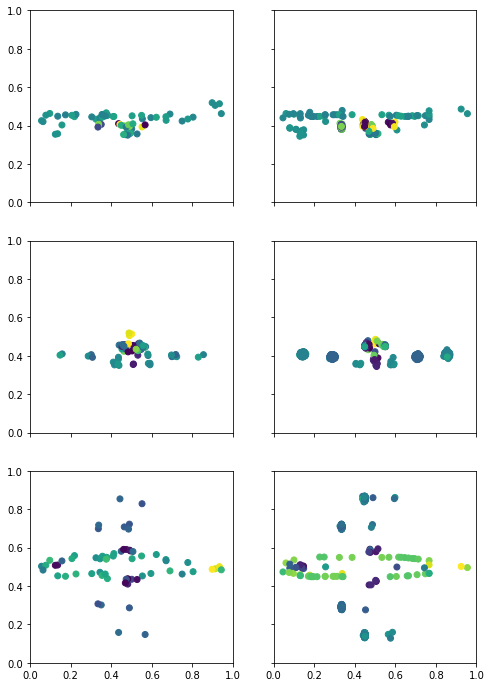

In [0]:
# test the network for an example from the training set
import matplotlib.pyplot as plt
id = 100
y_ = net(X[id:id+1])
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(8,12))
axs[0, 0].set_xlim(0, 1), axs[0, 0].set_ylim(0, 1)

_ = axs[0, 0].scatter(y_[0][:,0],    y_[0][:,2],    c=y_[0][:,1])
_ = axs[0, 1].scatter(Y[id][:,0],    Y[id][:,2],    c=Y[id][:,1])
_ = axs[1, 0].scatter(y_[0][:,1],    y_[0][:,2],    c=y_[0][:,0])
_ = axs[1, 1].scatter(Y[id][:,1],    Y[id][:,2],    c=Y[id][:,0])
_ = axs[2, 0].scatter(y_[0][:,0],    y_[0][:,1],    c=y_[0][:,2])
_ = axs[2, 1].scatter(Y[id][:,0],    Y[id][:,1],    c=Y[id][:,2])